In [3]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pydataset import data

In [4]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

## Simulation Based Approach
- Example: Codeup starts producing a scratch off lottery ticket called "Golden Codys". The odds of winning a prize must be advertised to the state, and since we are manufacturing the tickets, we know exactly how many winners and losers there are.
- Theory: Our population is the 1000 tickets we have manufactured
- Implementation: Create a boolean pandas Series
    - we model win with true and lose with false 
    - because of this, we can take the mean of a series to measure the likelihood of winning

The actual probability of winning is 0.25


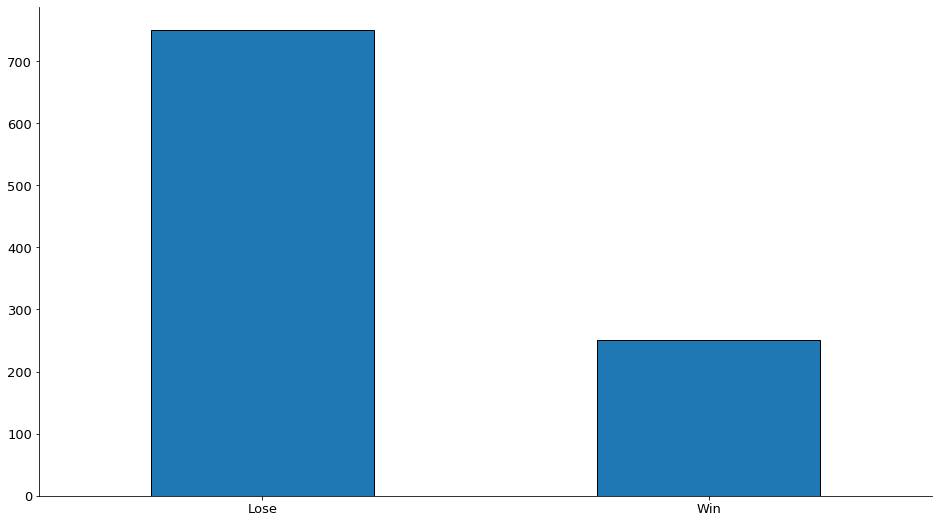

In [62]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation=0)
print('The actual probability of winning is %.2f' % tickets.mean())

## Scenario: Each student in a classroom is given a Golden Cody scratch off at random
- Theory

- We we take a random sample and calculate the win rate, we won't expect to see exactly 25% even though we know that is what the overall rate is.

- Examples of biased samples:

- non-response: people that don't respond are a diff population
- undercoverage: some groups aren't well represented
- voluntary: people volunteer for surveys
- leading questions
- social desirability
- Implementation: Use the .sample method on our series to randomly choose 25 tickets, representing 25 students in a classroom. Use .mean to calculate what percentage of the values are True, or are winning tickets.

In [63]:
n = 25
tickets.sample(n).mean()

0.12

- Scenario: each student in 4 different cohorts is given a Golden Codys scratch off ticket, we want to calculate the win rate for each classroom.
- Theory: it is unlikely any classroom will have exactly a 25% winrate, instead we will see slightly different numbers for each classroom.
- Implementation: loop through a range of 5 to get a sample and calculate the winrate 5 times. Each of the 5 numbers produced represents the calculated winrate for one classroom of 25 students.

In [64]:
[tickets.sample(n).mean() for _ in range(5)]

[0.28, 0.28, 0.08, 0.24, 0.36]

## Theory

- The winrates we see aren't ever exactly 25%, but we would expect the rate to be closer to 25% than further away. That is, it is more likely that a classroom will come up with a win rate of 24% than a winrate of 10%.

- If we were to repeat this experiment a whole bunch of times, say 10,000, we would find that the calculated winrates are, in fact, normally distributed.

- That is, we would expect the calculated average winrate for a classroom to follow a normal distribution, even though the underlying random process is not based on a normal distribution

- Implementation: To visualize this, we'll create a series full of calculated winrates for 10,000 classrooms, each classroom made up of 25 students. That is, we will simulate 10,000 classrooms of 25 students getting Golden Codys and calculate the average winrate for each of the 10,000 classrooms.

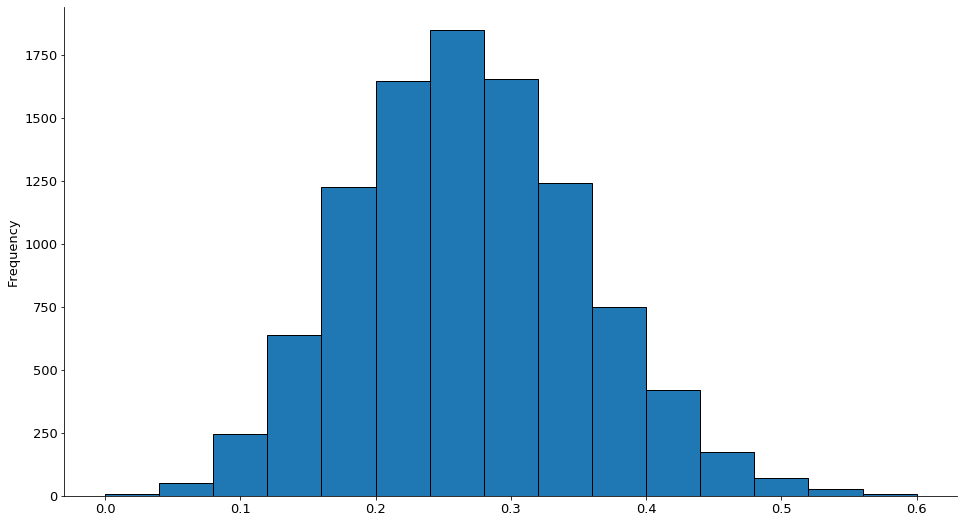

In [65]:
calculated_winrates = pd.Series([tickets.sample(n).mean() for _ in range(10_000)])
calculated_winrates.plot.hist(bins=15)

## Theory

- The above visual represents the sampling distribution for the winrate of Golden Codys, based on a class of 25.

- The Central Limit Theorm says that sampling distribution will be normally distributed even if the underlying random variable isn't.

## Mini Exercise -- CLT
1. Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls. 
   - I would say the average would be around 3. All the numbers have a even chance of coming out 
2. Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.
3. Plot the distribution of the calculated averages. What do you notice about the shape of the distribution of calculated averages? What kind of distribution is the underlying random variable (i.e. one dice roll?)

In [66]:
n_trials = n_rows = 10_000
n_dice = n_cols = 6
rolls = np.random.choice([1,2,3,4,5,6], n_rows * n_cols).reshape(n_rows,n_cols)
df = pd.DataFrame(rolls)
df["AVG"] = rolls.mean(axis = 1)
df

,0,1,2,3,4,5,AVG
0,3,1,4,2,5,2,2.833333
1,6,4,3,4,5,5,4.500000
2,4,3,6,4,5,4,4.333333
3,5,3,1,6,2,3,3.333333
4,3,1,5,4,4,6,3.833333
...,...,...,...,...,...,...,...
9995,6,4,1,4,5,1,3.500000
9996,6,2,6,2,4,4,4.000000
9997,2,1,5,3,4,4,3.166667
9998,1,1,4,4,5,5,3.333333


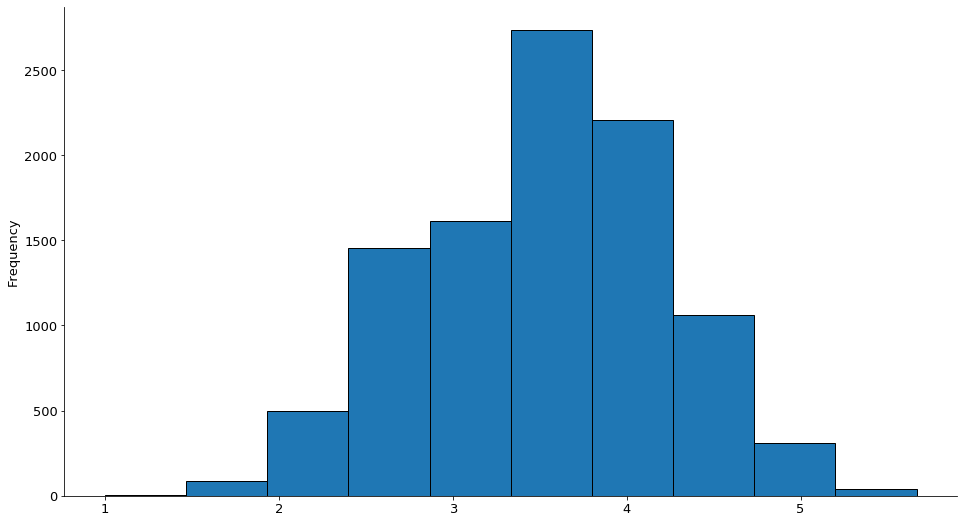

In [67]:
df.AVG.plot.hist(bins = 10)

What do you notice about the shape of the distribution of calculated averages? The shape is a normal distribution.  What kind of distribution is the underlying random variable (i.e. one dice roll?). I would say a uniform distribution as there is a 1 in 6 chance for all the numbers to come out. 

- Theory: in practice, we won't have 10,000 samples to work with, but rather just 1. We can stil rely on the sampling distribution being normally distributed, and this has some intersting properties.
- the mean of the sampling distribution of the sample means will be the "true" mean
- the variance of the sampling distribution is the population variable divided by the sample size
- the standard deviation of the sampling distribution is (pq/n)^.5 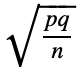
 (for our example), aka the standard error

In [68]:
se = math.sqrt((.25 * .75) / n)

Let's compare our calculated standard error (i.e. the standard deviation of the sample means) to the experimental value:

In [69]:
print('SE:                 %.4f' % se)
print('sample_means.std(): %.4f' % calculated_winrates.std())

SE:                 0.0866
sample_means.std(): 0.0857


### That the sampling distribution being normally distributed is very powerful and has important implications:

- confidence intervals for population parameter estimates (e.g. estimating the population mean)
- as n goes up, interval becomes smaller
- as certainty goes up, interval becomes larger
- 99% of calculated CIs will contain the true mean (e.g. if we ran simulations and re-sampled, 99% of the simulations' calculated CIs would contain the true mean)
- hypothesis testing
- One classroom calculates their winrate at 20% and claims the tickets were distributed unfairly. What is the likelihood we observe a 20% (or smaller) winrate just due to chance?

In [70]:
mean = calculated_winrates.mean()
sd = calculated_winrates.std()

stats.norm(mean, sd).cdf(.2)

0.28283511827393837

The probability we've calculated is a p-value. The likelihood that we observe the data that we have if the null hypothesis is true.



### Null and Alternative Hypothesis
- Ho
: status quo: no difference or no effect
- Ha
: alternative: there is a difference or effect
- whether Ha
 is ≠
, <, >, determines one-tailed vs two-tailed test
< or > == one-tailed
≠
 == two-tailed
### Hypothesis Testing Results
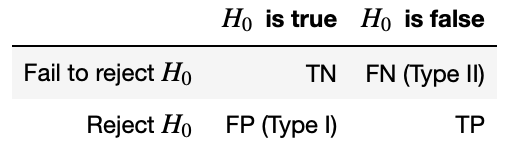

### Mini Exercise -- Null + Alternate Hypothesis and Errors 
For each of the following scenarios: refine the question, generate a null and alternative hypothesis, and give examples of true positives, true negatives, type I and type II errors.

- Are the average grades in web development vs data science classes different? 
    - Ho: The average grades are not significantly different.
    - Ha: The average grades are different
    - True Pos - Grades are different, reject Ho. p-value < .05 (alpha)
    - True Neg - Grades are similar, fail to reject Ho p-value > .05 (alpha)
    - Type 1 error - Grades are similar but Ho was rejected
    - Type 2 error - Grades are not similar and failed to reject the Ho
    
- Is there a relationship between how early a student shows up to class and their grade?
    - Ho : There is no relationship between students showing up early and their grade
    - Ha: There is a relationship between students showing up early and their grade
    - True Pos - There is a realtionship between grades and showing up earyly and rejecting the Ho. p-value < .05 (alpha)
    - True Neg - There is no relationship between grades and showing up early and fail to reject Ho. p-value > .05 (alpha)
    - Type 1 error - There is no relationship between grades and showing up early and rejected Ho
    - Type 2 error - There is a relationship between grades and showing up early and failed to reject the Ho
- Are web dev or data science students more likely to be coffee drinkers?
    - Ho: There is no difference between web dev or DS students being more likely to be coffee drinkers
    - Ha: There is a difference between web dev or DS students being more likely to be coffee drinkers
    - True Pos - There is a difference between DS & WD being coffee drinkers. Rejected the Ho
    - True Neg - There is no difference between DS & WD being coffee drinkers. Failed to reject the Ho
    - Type 1 error - There is no difference between DS & WD being coffee drinkers but the Ho was rejected
    - Type 2 error - There is a difference between DS & WD being coffee drinkers and  we failed to reject the Ho

### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [71]:
sample_1 = n1 = 40     
mean_1 = 90     
std_1 = s1 = 15
sample_2 = n2 = 50     
mean_2 = 100     
std_2 = s2 = 20
alpha = .05

### B. Set Hypothesis
$H_{0}$: Mean of home sales for office 1 = Mean of home sales for office 2

$H_{a}$: Mean of home sales for office 1 > Mean of home sales for office 2
### C. alpha = .05
### D. Sample of 40 & 50
### E. Compute test statistic and probability (t-statistic & p-value)

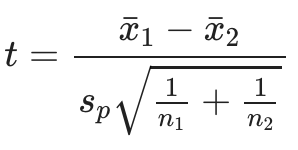

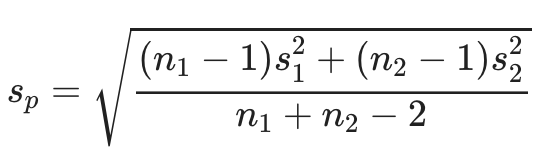

In [72]:
Sp = (((sample_1 - 1) * (std_1 ** 2) + (sample_2 - 1) * (std_2 ** 2))/(sample_1 + sample_2 - 2)) ** .5
print(Sp)

17.956702977389302


In [73]:
t = (mean_1 - mean_2) / (Sp * ((1/sample_1) + (1/sample_2)) ** .5)
print(t)

-2.6252287036468456


In [74]:
standard_error = se = (s1**2 / n1 + s2**2 / n2) ** .5
se

3.69120576505835

In [75]:
degf = n1 + n2 - 2
degf

88

In [78]:
p = stats.t(degf).sf(t) * 2
print(t,p)

-2.6252287036468456 1.9897901475507607


In [79]:
#p = stats.t(degf).cdf(t) * 2


In [80]:
# Fail to reject the null hyp Ho due to p being greater than alpha. There is not a significant difference between sells from
# office 1 and office 2
p < alpha

False

### 2. Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [ ]:
sns.get_dataset_names()

In [23]:
# Wrong data set
# df = sns.load_dataset('mpg')
# df.mpg.value_counts()
# df

In [24]:
mpg = data("mpg")
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
$H_{0}$: Mean fuel efficiency of 2008 cars = Mean of fuel efficency of 1999 cars

$H_{a}$: Mean fuel efficiency of 2008 cars != Mean of fuel efficency of 1999 cars

In [37]:
# Making a avg mpg variable
mpg["average_mpg"] = (mpg["cty"] + mpg["hwy"])/2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [105]:
# Making 2 variables for average mpg for cars in 1999 and 2008
cars_99 = mpg[mpg.year == 1999].average_mpg
cars_08 = mpg[mpg.year == 2008].average_mpg

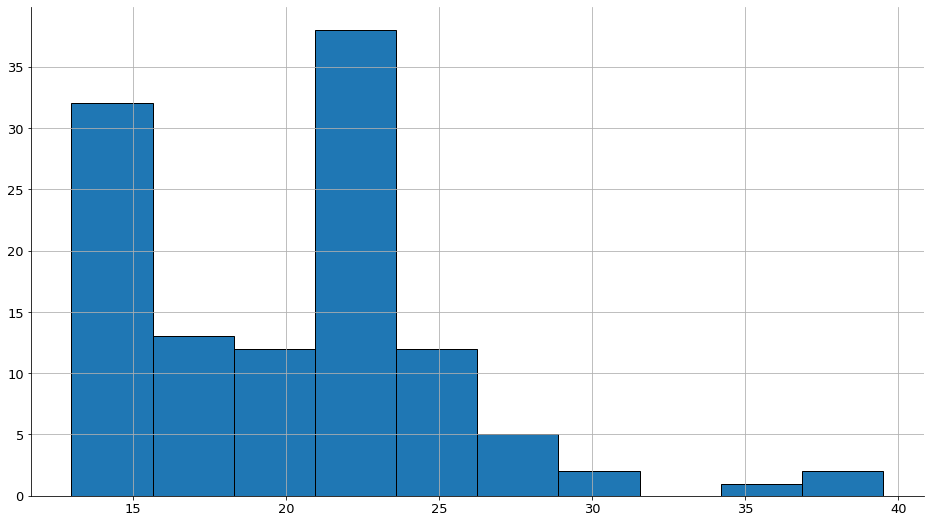

In [106]:
# Creating histograms of the mpg for each year
cars_99.hist()

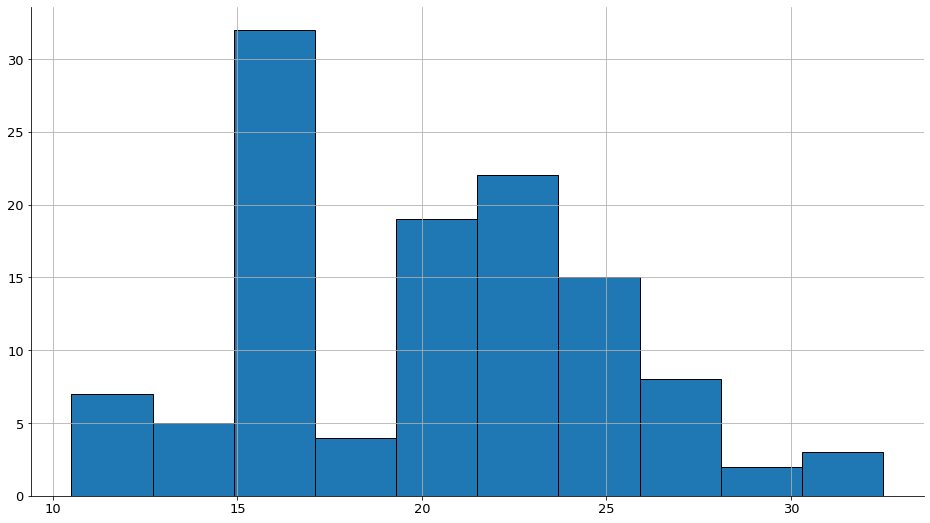

In [107]:
cars_08.hist()

In [108]:
# Checking variances. They are close enought. Histograms showed enough samples for test
print(cars_99.var())
print(cars_08.var())

27.122605363984682
24.097480106100797


In [109]:
t, p = stats.ttest_ind(cars_99, cars_08)
print(t, p)

0.21960177245940962 0.8263744040323578


In [ ]:
# p = .8263 which is > than alpha .05. We fail to reject the Ho (null hypothesis). There is no significant
# differences in mpg for 1999 and 2008 cars

### Are compact cars more fuel-efficient than the average car?
$H_{0}$: Mean fuel efficiency of compact cars = Mean of fuel efficency the average car

$H_{a}$: Mean fuel efficiency of compact cars > Mean of fuel efficency the average car

(array([ 9., 12., 14.,  7.,  1.,  2.,  1.,  0.,  0.,  1.]),
 array([19.5, 21.4, 23.3, 25.2, 27.1, 29. , 30.9, 32.8, 34.7, 36.6, 38.5]),
 <a list of 10 Patch objects>)

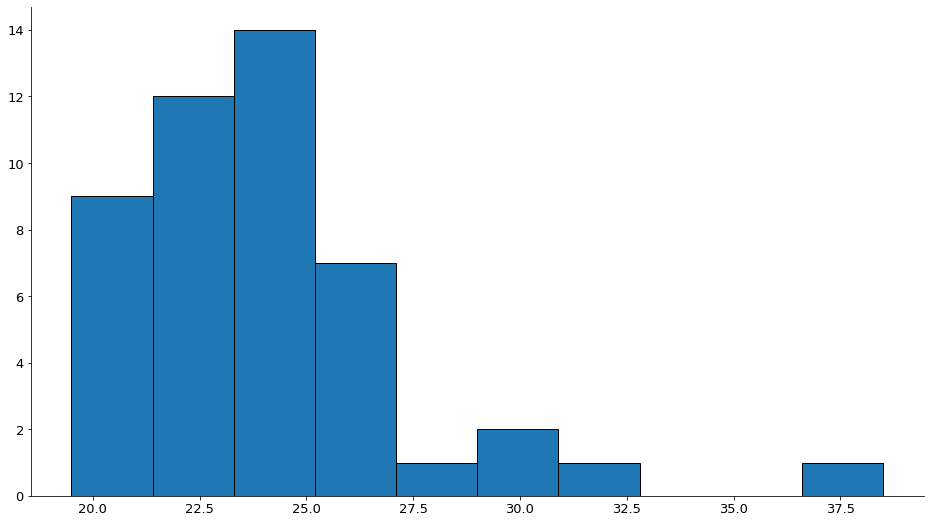

In [88]:
# First creating a column of compact cars avg mpg and all cars mpg
compact = mpg[mpg["class"] == "compact"].average_mpg
avg_mpg = mpg.average_mpg
plt.hist(compact)

(array([17., 51., 30., 57., 36., 29., 10.,  1.,  1.,  2.]),
 array([10.5, 13.4, 16.3, 19.2, 22.1, 25. , 27.9, 30.8, 33.7, 36.6, 39.5]),
 <a list of 10 Patch objects>)

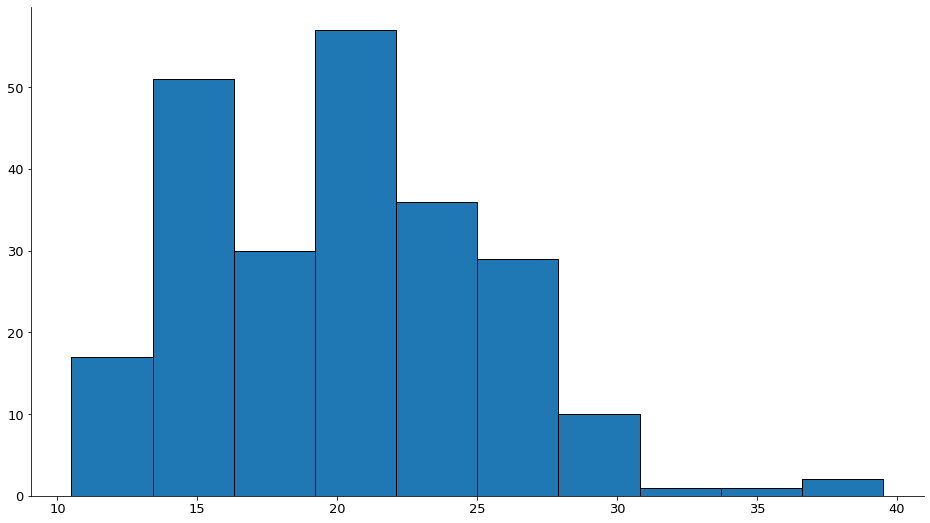

In [89]:
plt.hist(avg_mpg)

In [92]:
# P/2 due to question asking if compact cars get better mpg (greater than) than the average car
t, p = stats.ttest_ind(compact, avg_mpg)
print(t, p/2)

5.260311926248542 1.4342273079064686e-07


In [93]:
print("is p/2 < alpha? ", p < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [94]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$


In [91]:
# Reject the null hyp Ho due to p being less than alpha. There is a significant difference between mpg of 
# of compact cars and all 
p < alpha

True

### Do manual cars get better gas mileage than automatic cars?
$H_{0}$: Mean fuel efficiency of manual cars = Mean of fuel efficency of automatic cars

$H_{a}$: Mean fuel efficiency of manual cars > Mean of fuel efficency of automatic cars

In [58]:
# creating columns of automatic and manual cars. using np.where to search for "a" in category to label trans
mpg['trans_type'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg,trans_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,auto
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,manual
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,auto
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,manual


In [59]:
# Creating variables to get the averages of automatic and manual trans
auto = mpg[mpg["trans_type"] == "auto"].average_mpg
manual = mpg[mpg["trans_type"] == "manual"].average_mpg
print(auto.var())
print(manual.var())

21.942777233382337
26.635167464114826


(array([ 6., 35., 27., 20., 35., 18.,  9.,  4.,  2.,  1.]),
 array([10.5 , 12.95, 15.4 , 17.85, 20.3 , 22.75, 25.2 , 27.65, 30.1 ,
        32.55, 35.  ]),
 <a list of 10 Patch objects>)

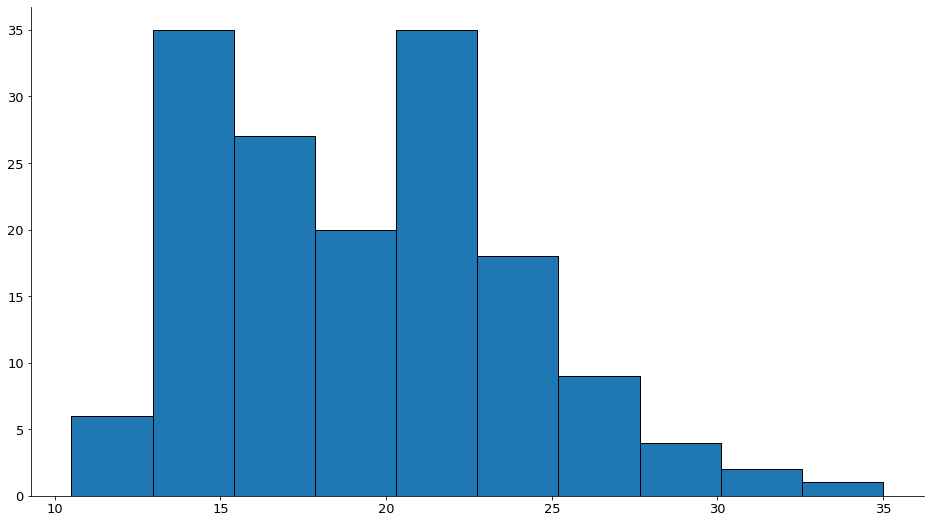

In [100]:
plt.hist(auto)

(array([ 1., 10.,  8., 22., 10., 19.,  4.,  1.,  0.,  2.]),
 array([10.5, 13.4, 16.3, 19.2, 22.1, 25. , 27.9, 30.8, 33.7, 36.6, 39.5]),
 <a list of 10 Patch objects>)

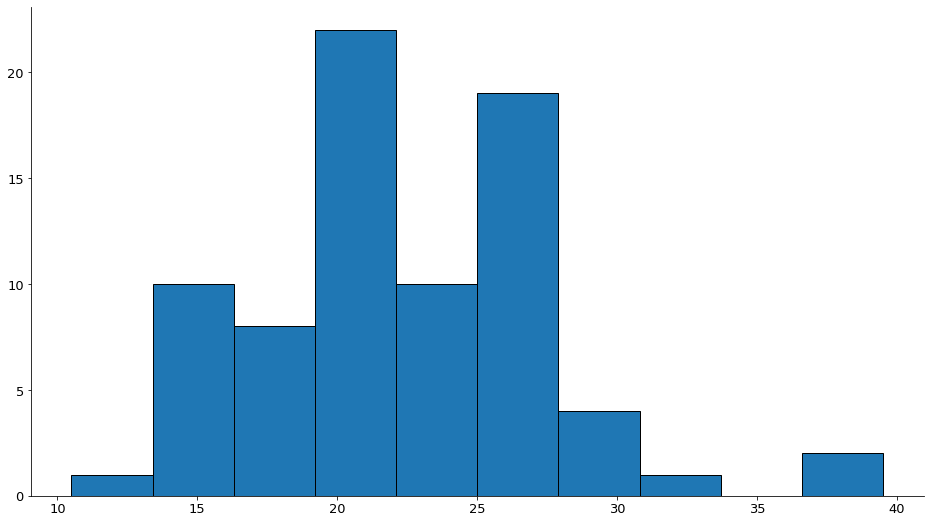

In [101]:
plt.hist(manual)

In [102]:
# P/2 due to the question asking if auto trans has a better mpg (greater than) than manual
t, p = stats.ttest_ind(auto, manual)
print(t, p/2)

-4.593437735750014 3.5771872005728416e-06


In [ ]:
# Reject the null hyp Ho due to p being less than alpha. There is a significant difference between mpg of 
# automatic and manual transmission 
p < alpha

### Faiths Example using the tips data set

𝐻0 : There is no difference between women's and men's tips.

𝐻𝑎: There is a difference between women's and men's tips.

In [5]:
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


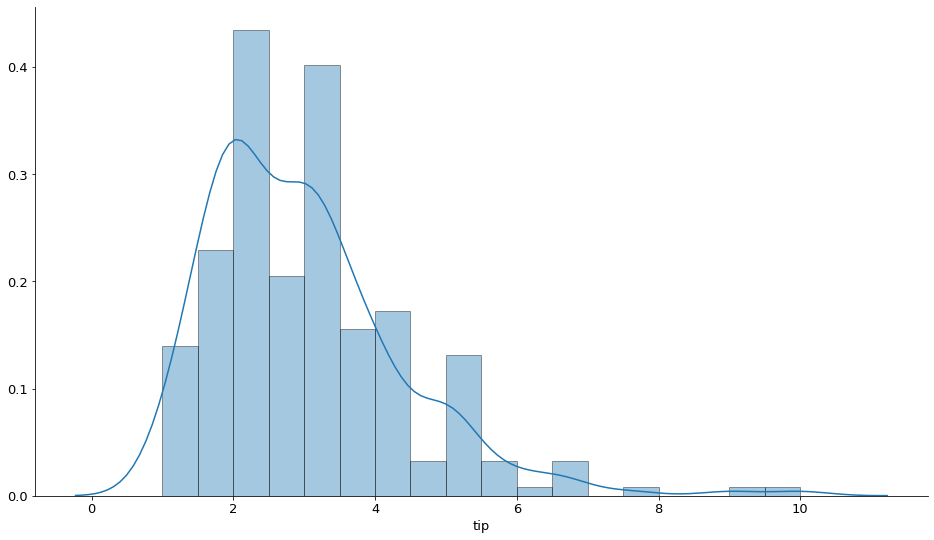

In [10]:
sns.distplot(df.tip)

In [15]:
alpha = .05
men = df[df["sex"] == "Male"]
women = df[df["sex"] == "Female"]

In [16]:
t, p = stats.ttest_ind(men.tip, women.tip)
print(t, p)
print(f'Our p-value is {round(p, 3)}.')
print(f'This means there is about a {round(p * 100, 2)}% chance that we observe the data we have.')

1.3878597054212687 0.16645623503456763
Our p-value is 0.166.
This means there is about a 16.65% chance that we observe the data we have.


In [ ]:
# We fail to reject the null hyp Ho. due to p > alpha

𝐻0 : There is no difference between smokers' tips and the overall population's tip average.

𝐻𝑎: There is a difference between smokers' tips and the overall population's tip average.

In [18]:
smoker = df[df["smoker"] == "Yes"]

In [21]:
t,p = stats.ttest_1samp(smoker.tip, df.tip.mean())
print(t, p)

0.07177676877620091 0.9429353685499238


In [ ]:
# We fail to reject the null hyp Ho. due to p > alpha. there is no difference between smokers tips and overall population average tips

## Correlations Exercises

### 1. Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [2]:
telco = pd.read_csv("telco_churn_data.csv")
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [3]:
# looking at data and if there are any nulls
telco.head()
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


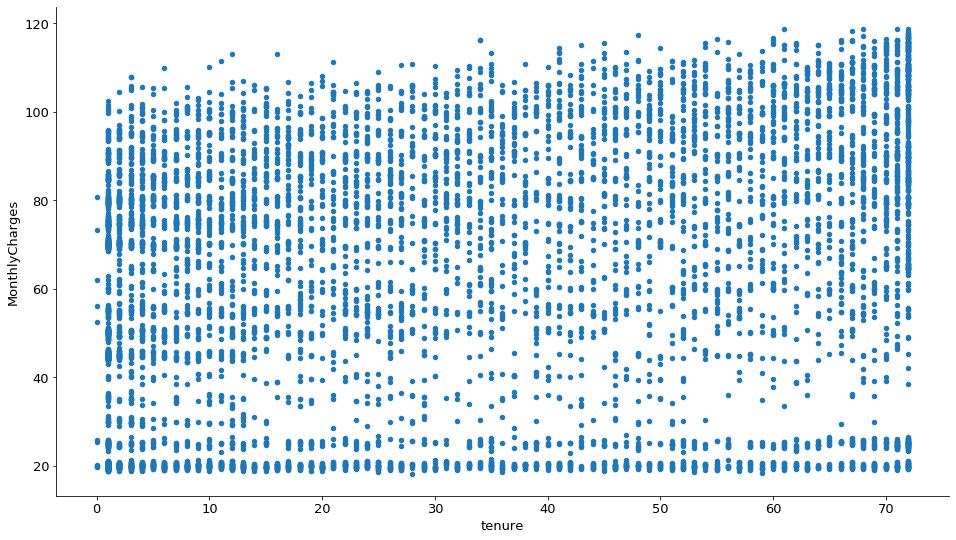

In [166]:
telco.plot.scatter(y='MonthlyCharges', x='tenure')

$\alpha = .05$

$H_0$: There is no linear relationship between monthly charges and tenure.

$H_a$: There is a linear relationship between monthly charges and tenure.

In [167]:
x = telco.tenure
y = telco.MonthlyCharges

In [5]:
#Conclusion: we reject the null hypothesis p < alpha that there is no linear relationship between
# monthly charges and tenure.
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.24789985628615005
p = 4.0940449915016345e-99


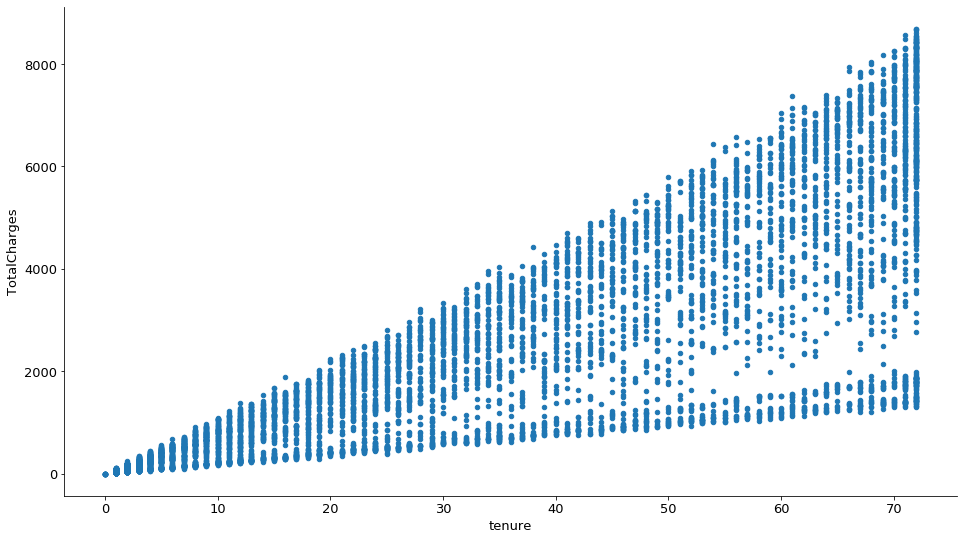

In [168]:
telco.plot.scatter(y='TotalCharges', x='tenure')

In [6]:
# Total charges? Can't plot due to values missing in total charges. Use .fillna(0)
# Reject the null hyp p < alpha that there is no linear relationship between tenure
# and total charges
telco['TotalCharges'] = telco['TotalCharges'].fillna(0)
x = telco.tenure
y = telco.TotalCharges
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.826178397950242
p = 0.0


### What happens if you control for phone and internet service?
H0: There is no linear relationship between total charges and tenure for customers with phone service

Ha: There is a linear relationship between total charges and tenure for customers with phone service

In [171]:
# Setting up variables for phone or no phone service
has_phone = telco[telco.PhoneService == 'Yes']
no_phone = telco[telco.PhoneService == 'No']
#telco

In [18]:
# Reject the null hyp p < alpha that there is no linear relationship between total 
# charges and tenure with control for having phone
r, p = stats.pearsonr(has_phone.TotalCharges, has_phone.tenure)
print('r=', r)
print('p=', p)

r= 0.8301076972900363
p= 0.0


In [19]:
# Reject the null hyp p < alpha that there is no linear relationship between total 
# charges and tenure with control for having no phone
r, p = stats.pearsonr(no_phone.TotalCharges, no_phone.tenure)
print('r=', r)
print('p=', p)

r= 0.9535697728407463
p= 0.0


H0: There is no linear relationship between total charges and tenure for customers with internet service

Ha: There is a linear relationship between total charges and tenure for customers with internet service

In [173]:
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,has_internet
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,yes
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,yes


In [8]:
# Setting a column/variable to see if there is internet or no internet
telco['has_internet'] = np.where(telco.InternetService.str.startswith('N'), 'no', 'yes')

In [14]:
# Now setting a column/varialble for internet or no internet
yes_internet = telco[telco.has_internet == 'yes']
no_internet = telco[telco.has_internet == 'no']
r, p = stats.pearsonr(yes_internet.TotalCharges, yes_internet.tenure)
print('r=', r)
print('p=', p)
# Reject the null hyp p < alpha that there is no linear relationship between total 
# charges and tenure for cutomers with internet service

r= 0.9320165580130638
p= 0.0


In [15]:
# Reject the null hyp p < alpha that there is no linear relationship between total 
# charges and tenure for cutomers with no internet service
r, p = stats.pearsonr(no_internet.TotalCharges, no_internet.tenure)
print('r=', r)
print('p=', p)

r= 0.9815669784401057
p= 0.0


### 2. Use the employees database.
### Is there a relationship between how long an employee has been with the company and their salary?
### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

$\alpha = .05$

$H_0$: There is no linear relationship between employee tenure and salary.

$H_a$: There is a linear relationship between employee tenure and salary.

In [112]:
# importing env to get username/password
import env
# Writting a function to access the sql db
def get_db_url(username, hostname, password, db_name):
    return f"mysql+pymysql://{user}:{password}@{host}/{db_name}"

In [113]:
# writting querry to look at tenure and salaries
query = """
    SELECT emp_no, salary, DATEDIFF('2002-09-30', e.hire_date) as datediff, e.hire_date, t.title
    FROM salaries as s
    JOIN employees as e USING(emp_no)
    JOIN titles as t USING(emp_no)
    WHERE
    s.to_date > '2002-09-30'
    AND t.to_date > '2002-09-30';
"""

In [114]:
# URL
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

In [123]:
# Reading the sql query
tenure = pd.read_sql(query, url)

In [124]:
tenure

,emp_no,salary,datediff,hire_date,title
0,10001,88958,5940,1986-06-26,Senior Engineer
1,10002,72527,6157,1985-11-21,Staff
2,10003,43311,5877,1986-08-28,Senior Engineer
3,10004,74057,5782,1986-12-01,Senior Engineer
4,10005,94692,4766,1989-09-12,Senior Staff
...,...,...,...,...,...
240119,499995,52868,3548,1993-01-12,Engineer
240120,499996,69501,4386,1990-09-27,Senior Engineer
240121,499997,83441,6006,1986-04-21,Senior Engineer
240122,499998,55003,3274,1993-10-13,Senior Staff


In [128]:
# Make pd series for salaries and tenure "date_diff" so we could do
salaries = tenure.salary
date_diff = tenure.datediff

In [132]:
# Reject the null hyp p < alpha that there is no linear relationship between tenure 
# and salaries
r, p = stats.pearsonr(salaries, date_diff)
print('r=', r)
print('p=', p)

r= 0.3064625613186077
p= 0.0


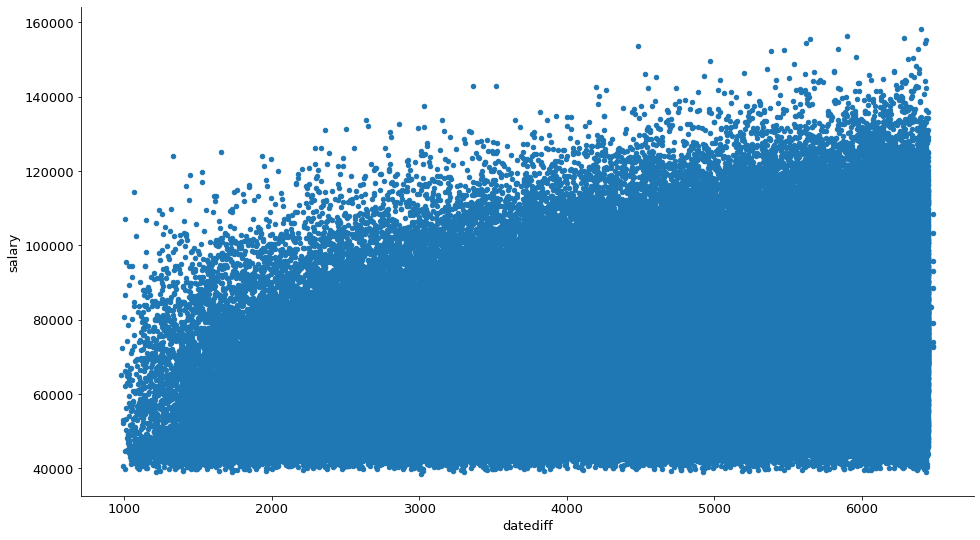

In [134]:
tenure.plot.scatter("datediff", "salary")

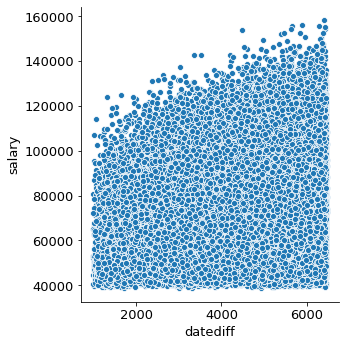

In [136]:
sns.relplot(data=tenure, y="salary", x = "datediff")

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

Ho
 : There is no linear relationship between employee tenure and number of titles.
 
𝐻𝑎
: There is a linear relationship between employee tenure and number of titles.

In [115]:
# query creates a dataframe with title counts by employee number
title_count = """
    SELECT employees.emp_no, count(*) as count
    FROM employees
    JOIN titles ON titles.emp_no=employees.emp_no
    GROUP BY employees.emp_no;
"""
# apply query and asign dataframe
df_title_count = pd.read_sql(title_count, url)

# reset emp_no to the index to make dataframe 1D
df_title_count = df_title_count.set_index("emp_no")

# convert 1D dataframe into a Pandas Series
title_count_s = df_title_count.squeeze()
title_count_s

emp_no
10001     1
10002     1
10003     1
10004     2
10005     2
         ..
499995    1
499996    2
499997    2
499998    2
499999    1
Name: count, Length: 300024, dtype: int64

In [116]:
# query creates a dataframe with title counts by employee number
query = """
    SELECT emp_no, DATEDIFF('2002-09-30', hire_date) as datediff
    FROM employees;
"""
# apply query and asign dataframe
df_employees_tenure = pd.read_sql(query, url)

# reset emp_no to the index to make dataframe 1D
df_employees_tenure = df_employees_tenure.set_index("emp_no")

# convert 1D dataframe into a Pandas Series
emp_tenure_s = df_employees_tenure.squeeze()

In [139]:
# Use the Series' I created above to run a Pearson's R stats test
corr, p = stats.pearsonr(title_count_s, emp_tenure_s)
print(f"r = {corr:.4}")
print(f"p ={p}")

r = 0.2666
p =0.0


In [ ]:
# Reject the null hyp p < alpha that there is no linear relationship between tenure 
# and titles

### 3. Use the sleepstudy data. Is there a relationship between days and reaction time?
H0: There is no linear relationship between days without sleep and reaction time

Ha: There is a linear relationship between days without sleep and reaction time


In [174]:
sleep = data('sleepstudy')
df = pd.DataFrame(sleep)
df

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


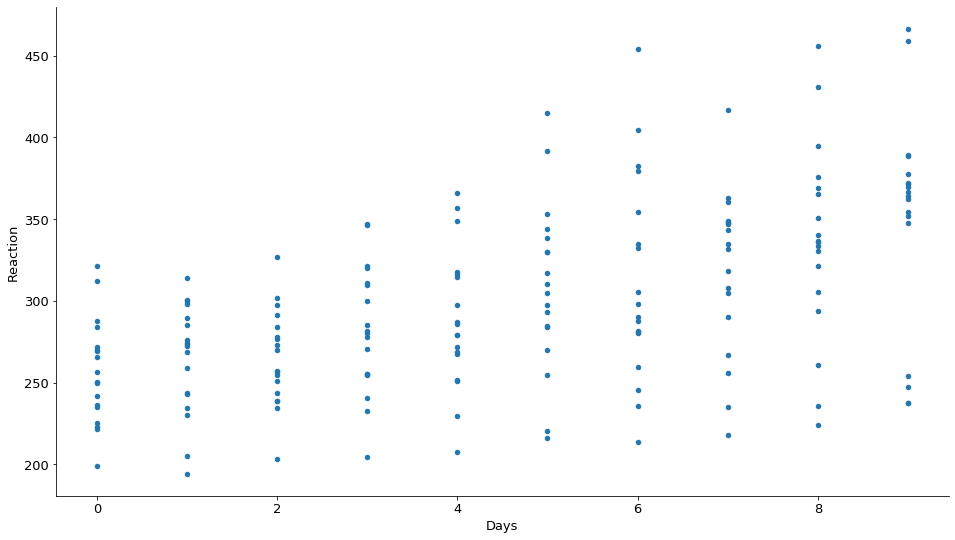

In [176]:
df.plot.scatter( x= "Days", y= "Reaction")

In [178]:
x = df.Days
y= df.Reaction
corr, p = stats.pearsonr(x, y)
print(corr, p)

0.5352302262650253 9.894096322214812e-15


In [ ]:
# We reject the Ho due to p < alpha

## Chi2
Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

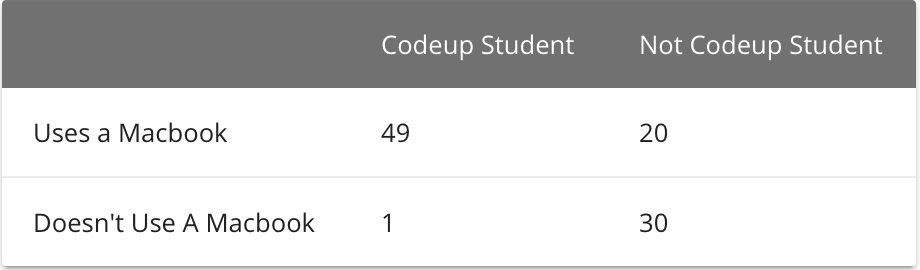

In [186]:
#Creating a df to show the corresponding table of mac/non mac users and being a codeup student/not
index = ['Uses a Mac', "Does not use a Mac"]
columns = ['Codeup student', 'Not Codeup student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
observed

,Codeup student,Not Codeup student
Uses a Mac,49,20
Does not use a Mac,1,30


### Null Hypothesis

$H_0$: Using a Mac and being a Codeup student are independent (not dependent)

$H_a$: Using a Mac and being a Codeup student are dependent

In [187]:
alpha = .05
# .chi2_contingency to return chi2, p, degf, and expected
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(chi2, p, degf, expected)

36.65264142122487 1.4116760526193828e-09 1 [[34.5 34.5]
 [15.5 15.5]]


In [181]:
# Reject the null hypothesis Ho, p < alpha.

Choose another 2 categorical variables from the mpg dataset and perform a 
c
h
i
2
 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [120]:
# Using the curriculum as an example
mpg = data('mpg')
mpg['transmission'] = mpg.trans.str[:-4] # Takes off the last 4 characters of the string ie.(I5)
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,auto


In [121]:
#Create the crosstab to get the observed values of drv and trans
observed = pd.crosstab(mpg.drv, mpg.transmission)
observed

transmission,auto,manual
drv,,
4,75,28
f,65,41
r,17,8


### Null Hypothesis
$H_0$: Transmission type and Drv (drive type) are independent (not dependent)

$H_a$: Transmission type and Drv (drive type) are dependent

In [122]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(chi2, p, degf, expected)

3.1367692459711143 0.20838152534979626 2 [[69.10683761 33.89316239]
 [71.11965812 34.88034188]
 [16.77350427  8.22649573]]


In [ ]:
# We failed to reject the null hypothesis Ho (p > .05)

In [194]:
tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


𝐻o  = Whether a person is a smoker is independent of his/her sex.

𝐻𝑎 = Whether a person is a smoker is not independent of his/her sex.

In [196]:
alpha = .05
ctab = pd.crosstab(tips.smoker, tips.sex)
ctab

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


In [201]:
chi2, p, degf, expected = stats.chi2_contingency(ctab)
print(f"The p-value is {p}")
#We fail to reject the null hypothesis that a smoker and his/her sex is independent. 

The p-value is 0.925417020494423


𝐻0  = Whether a person churns is independent of the package type they purchase.

𝐻𝑎  = Whether a person churns is not independent of the package type they purchase.

In [202]:
index = ["Churn" , "No Churn"]
columns = ["Product A", "Product B"]
observed = pd.DataFrame([[100, 50], [120, 28]], index=index, columns=columns)
observed

,Product A,Product B
Churn,100,50
No Churn,120,28


In [204]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f"The p-value is {p}")
#We reject the null hypothesis that a person who churns is independent of the package type they purchase

The p-value is 0.006966211555667255


### Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
Is an employee's gender independent of whether or not they are or have been a manager?

In [124]:
from env import host, user, password

def get_db_url(database, user=user, host=host, password=password): 
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

url = get_db_url('employees')

Ho: Employees gender is independent (not dependent) of working in sales or marketing.
Ha: Employees gender is dependent of working in sales or marketing.

In [127]:
query = '''
SELECT  e.emp_no, e.gender, d.dept_name
FROM employees as e
Join dept_emp as dept on dept.emp_no = e.emp_no
Join departments as d on d.dept_no = dept.dept_no
where dept.to_date > now()
'''
employee = pd.read_sql(query, url)
employee

,emp_no,gender,dept_name
0,10038,M,Customer Service
1,10049,F,Customer Service
2,10060,M,Customer Service
3,10088,F,Customer Service
4,10112,F,Customer Service
...,...,...,...
240119,499966,F,Sales
240120,499976,M,Sales
240121,499980,M,Sales
240122,499986,F,Sales


In [128]:
observed = pd.crosstab(employee.gender, employee.dept_name)
observed

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
gender,,,,,,,,,
F,7007,24533,5014,5147,5864,21393,5872,6181,14999
M,10562,36853,7423,7751,8978,31911,8674,9260,22702


In [131]:
#Creating a sales only df
sales = employee.dept_name =="Sales"
sales_emp = employee[sales]

In [132]:
#Creating a marketing only df
marketing = employee.dept_name =="Marketing"
marketing_emp = employee[marketing]

In [135]:
sales_marketing_df = pd.concat([sales_emp, marketing_emp])
sales_marketing_df

,emp_no,gender,dept_name
202423,10002,F,Sales
202424,10016,M,Sales
202425,10041,F,Sales
202426,10050,M,Sales
202427,10053,F,Sales
...,...,...,...
119127,499884,F,Marketing
119128,499934,F,Marketing
119129,499968,M,Marketing
119130,499970,M,Marketing


In [136]:
# Create new crosstab of new sales_marketing_df
observed = pd.crosstab(sales_marketing_df.gender, sales_marketing_df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [137]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f"The p-value is {p}")
#We fail to reject the null hyp Ho that gender is independent of working in sales and marketing

The p-value is 0.5691938610810126


Is an employee's gender independent of whether or not they are or have been a manager?
Ho: Employees gender is independent of being a manager
Ha: Employees gender is dependent

In [60]:
# Normal dist, given mean an std. want to now sales @ top 10%
μ = 12000
σ = 2000

sales = stats.norm(μ, σ)
sales.isf(.1)

14563.103131089201

A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window. What is the probability that no cars drive up in the noon hour? What is the probability that 3 or more cars come through the drive through? How likely is it that the drive through gets at least 1 car?

In [61]:
# Poisson
mean = 2
stats.poisson(2).pmf(0)

0.1353352832366127

In [62]:
#What is the probability that 3 or more cars come through the drive through?
stats.poisson(2).sf(2)

0.32332358381693654

In [64]:
#How likely is it that the drive through gets at least 1 car?
stats.poisson(2).sf(0)

0.8646647167633873

2 Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following: What grade point average is required to be in the top 5% of the graduating class? What GPA constitutes the bottom 15% of the class? An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship? If I have a GPA of 3.5, what percentile am I in?


In [139]:
# What grade point average is required to be in the top 5% of the graduating class?
mean = 3
std = .3
top5 = stats.norm(mean, std).ppf(.95)
top5

3.4934560880854417

In [141]:
# What GPA constitutes the bottom 15% of the class?
bottom15 = stats.norm(mean,std).ppf(.15)
bottom15

2.689069983151863

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. 

In [71]:
third_dec = stats.norm(mean,std).ppf([.2,.3])
third_dec

array([2.74751363, 2.84267985])

In [144]:
#If I have a GPA of 3.5, what percentile am I in?
stats.norm(mean,std).cdf(3.5)

0.9522096477271853

In [73]:
#If you flip 8 coins, what is the probability of getting exactly 3 heads? 
trials = 8
p = .5
stats.binom(trials,p).pmf(3)

0.21875000000000014

In [75]:
# What is the probability of getting more than 3 heads?
stats.binom(trials,p).sf(3)

0.6367187499999999

3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?


In [76]:
p = .25
trials = 2
stats.binom(trials,p).pmf(2)

0.21093750000000006

4. Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

In [85]:
mean = 3
std = 1.5
n = 17
stats.norm(mean,std).cdf(4)

0.7475074624530771

A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [88]:
p = .02
n = visitors = 4326
clicks = 97
stats.binom(n,p).sf(96)

0.1397582363130086

You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.
What is the probability that at least one of your first 60 answers is correct?

In [89]:
p = .01
n = 60
stats.binom(n,p).sf(0)

0.4528433576092388

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?


In [91]:
p = .03
n = .9 * 22 * 3
stats.binom(n,p).sf(0)

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py:67: RuntimeWarning: floating point number truncated to an integer
  return special.bdtrc(k, n, p)


0.8342199288437355

In [95]:
# How likely is it that it goes two days without getting cleaned up?
n = .9 * 22 * 3 * 2
stats.binom(n,p).cdf(0)

0.027483031992576134

In [97]:
#All week?
n = .9 * 22 * 3 * 5
stats.binom(n,p).cdf(0)

0.00011781621791055051

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [102]:
mean = 15 * 2
std = 3 * 2
wait_to_order = 2
get_food = 10
time_left = 15
lunch = 60
time = lunch - get_food - time_left
time

35

In [103]:
stats.norm(mean,std).cdf(35)

0.7976716190363569

In [145]:
die_dist = stats.randint(1,7)
die_dist

In [146]:
# What is the likelihood we roll greater than 2? Use sf
die_dist.sf(2)

0.6666666666666667

In [147]:
# Working with distributions. rvs(()) shows me 5 rows 2 cols of random values
die_dist.rvs((5,2))

array([[2, 5],
       [3, 1],
       [5, 3],
       [5, 5],
       [5, 1]])

In [148]:
# Whats the probability of rolling a 4? 4 is a discrete variable, so us pmf
die_dist.pmf(4)

0.16666666666666666

In [149]:
# What is the probablity that we roll a 3 or less? Use cdf
die_dist.cdf(3)

0.5